1. Import thư viện pandas và đọc file xlsx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_excel(r"D:\SSMS\python for DA\FinalProject\dataset.xlsx")
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


a. Kiểm tra dữ liệu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

b. Clean data: Kiểm tra xem có dữ liệu lỗi hay không

In [5]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Tiến hành clean data (vì số lượng bị lỗi chỉ là 2 cột nên có thể tiến hành loại bỏ 2 cột đấy luôn)

In [6]:
df = df[df['UnitPrice'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Số lượng bị âm là do trả lại hàng hoặc là đơn hàng bị huỷ

In [7]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Kiểm tra duplicated giữa các dòng

In [8]:
df.duplicated().sum()

5263

In [9]:
df[df.duplicated() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Kiểm tra các dữ liệu bất thường

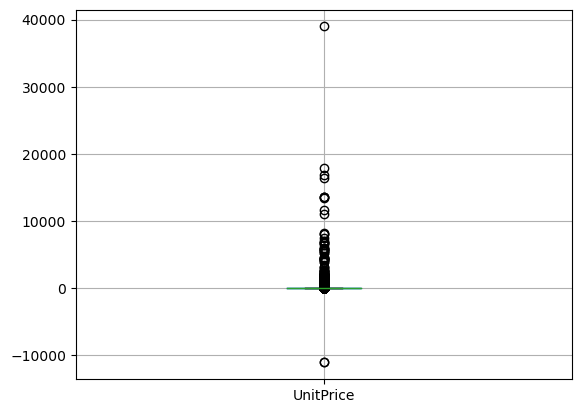

Số lượng outlier: 39627


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Vẽ boxplot của cột 'UnitPrice' trong DataFrame df
df[['UnitPrice']].boxplot()
plt.show()

# Tính toán các giá trị cần thiết cho boxplot
q1 = np.percentile(df['UnitPrice'], 25)
q3 = np.percentile(df['UnitPrice'], 75)
iqr = q3 - q1

# Xác định outlier
outliers = df[(df['UnitPrice'] < q1 - 1.5 * iqr) | (df['UnitPrice'] > q3 + 1.5 * iqr)]

# In số lượng outlier
print("Số lượng outlier:", len(outliers))


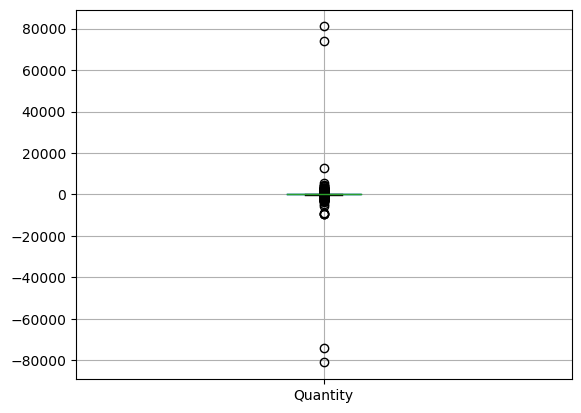

In [26]:
df[['Quantity']].boxplot()
plt.show()

2. Trực quan hoá dữ liệu

In [2]:
import matplotlib.pyplot as plt

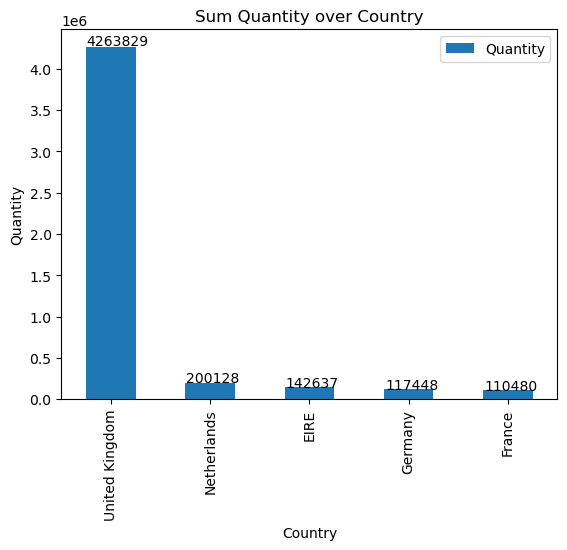

In [5]:
ax = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar', legend = True)
plt.title('Sum Quantity over Country')
plt.xlabel('Country')
plt.ylabel('Quantity')

for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [18]:
country_stats = df['Quantity'].agg(['mean', 'var', lambda x: x.mode().iloc[0], 'median', 'std']).reset_index()

# Rename the lambda function column to 'Mode'
country_stats.rename(columns={country_stats.columns[1]: 'Mode'}, inplace=True)

print(country_stats)


      index          Mode
0      mean      9.552250
1       var  47559.391409
2  <lambda>      1.000000
3    median      3.000000
4       std    218.081158


In [20]:
country_stats = df['UnitPrice'].agg(['mean', 'var', lambda x: x.mode().iloc[0], 'median', 'std']).reset_index()

# Rename the lambda function column to 'Mode'
country_stats.rename(columns={country_stats.columns[1]: 'Mode'}, inplace=True)

print(country_stats)

      index         Mode
0      mean     4.611114
1       var  9362.469164
2  <lambda>     1.250000
3    median     2.080000
4       std    96.759853


Vì công ty có trụ sở ở Anh nên doanh số bán hàng ở Anh luôn là cao nhất

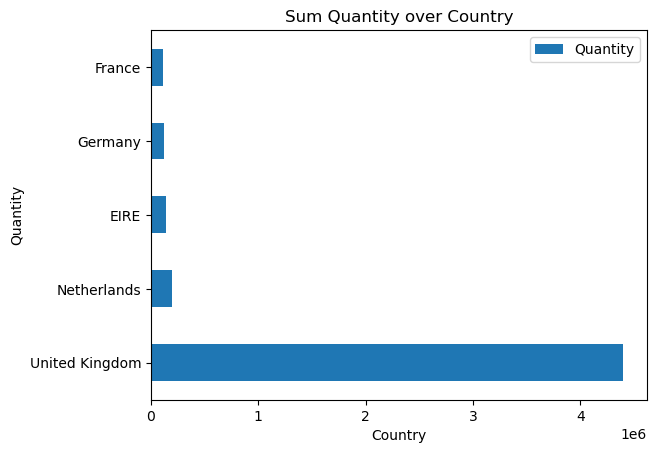

In [25]:
ax = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).head(5).plot(kind = 'barh', legend = True)
plt.title('Sum Quantity over Country')
plt.xlabel('Country')
plt.ylabel('Quantity')

plt.show()

Ngoài Anh có thể xem xét các thị trường tiềm năng như Hà Lan, Đức, Pháp để có thể phát triển thị trường tại đây.

In [24]:
df[df['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')

<Axes: ylabel='Country'>

Các quốc gia ở Trung Đông có doanh số bán thấp => có thể dừng kinh doanh tại các quốc gia này hoặc thay đổi chiến lược tiếp cận tại các thị trường này

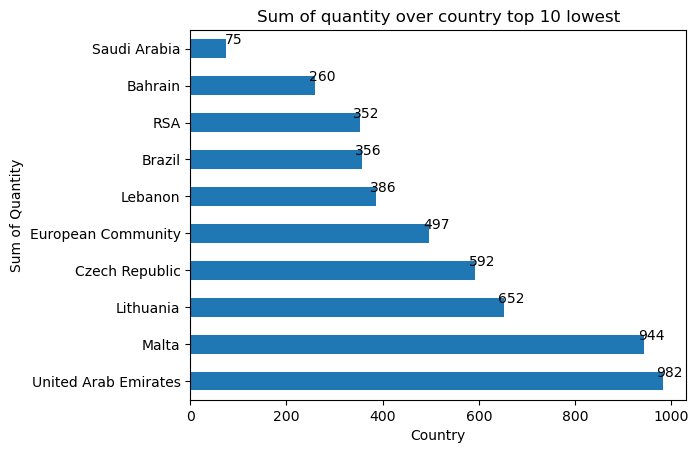

In [9]:
ax = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).tail(10).plot(kind = 'barh')
plt.title('Sum of quantity over country top 10 lowest')
plt.xlabel('Country')
plt.ylabel('Sum of Quantity')

for p in ax.patches:
    ax.annotate(str(round(p.get_width(), 2)), (p.get_width(), p.get_y()), textcoords="offset points", xytext=(5,10), ha='center')

plt.show()

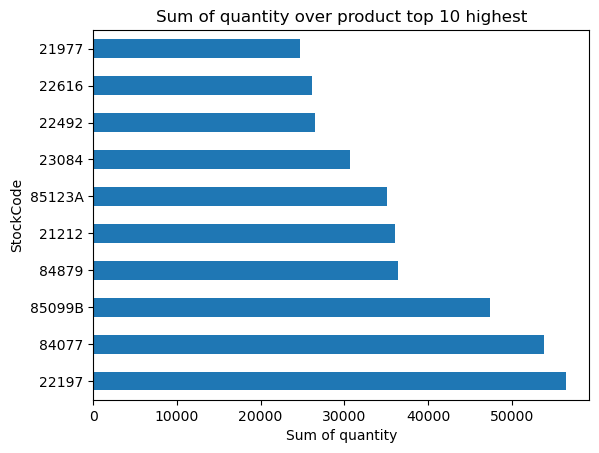

In [22]:
df.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('Sum of quantity over product top 10 highest')
plt.xlabel('Sum of quantity')
plt.ylabel('StockCode')
plt.show()

In [21]:
df['StockCode'] = df['StockCode'].astype(str)
df[df['StockCode'] == '84077']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TOTAL_REVENUE
3259,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:09:00,0.29,14047.0,United Kingdom,13.92
3297,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:17:00,0.29,17017.0,United Kingdom,13.92
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,518.40
5047,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2010-12-02 18:25:00,0.21,15093.0,United Kingdom,60.48
5278,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-03 10:26:00,0.29,13370.0,United Kingdom,13.92
...,...,...,...,...,...,...,...,...,...
534797,581171,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07 15:02:00,0.29,12615.0,France,13.92
538240,581403,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-08 13:46:00,0.29,13510.0,United Kingdom,13.92
538846,581419,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2011-12-08 15:03:00,0.21,15484.0,United Kingdom,60.48
540377,581478,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-09 08:59:00,0.29,17364.0,United Kingdom,13.92


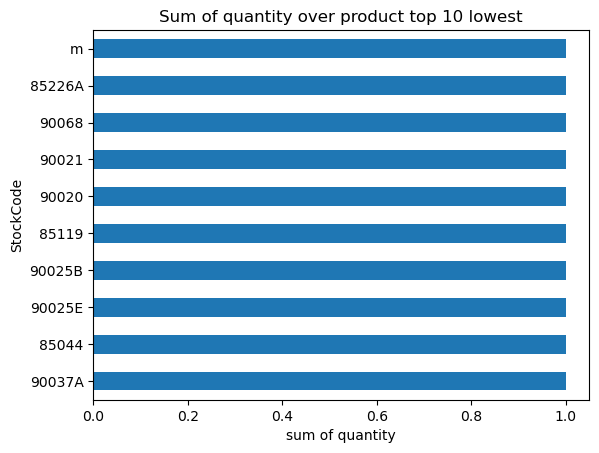

In [35]:
df[df['Quantity'] > 0].groupby('StockCode')['Quantity'].sum().sort_values(ascending = False).tail(10).plot(kind = 'barh')
plt.title('Sum of quantity over product top 10 lowest')
plt.xlabel('sum of quantity')
plt.ylabel('StockCode')
plt.show()

In [68]:
top10_lowest = df[df['Quantity'] > 0].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).tail(10)

for stock_code in top10_lowest.index:
    description = df.loc[df['StockCode'] == stock_code, 'Description'].iloc[0]
    print(description)


TINY CRYSTAL BRACELET RED
nan
BAROQUE BUTTERFLY EARRINGS MONTANA
BAROQUE BUTTERFLY EARRINGS RED
WATERING CAN SINGLE HOOK PISTACHIO
FILIGREE DIAMANTE CHAIN
LASER CUT MULTI STRAND NECKLACE
RUBY GLASS NECKLACE 42"
nan
Manual


In [2]:
df['TOTAL_REVENUE'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TOTAL_REVENUE
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


3. Phân cụm khách hàng

In [3]:
from sklearn.cluster import KMeans

In [4]:
cluster_data = df.groupby('CustomerID').agg({'InvoiceNo': lambda num: num.nunique(), "TOTAL_REVENUE": lambda price: price.sum()})
cluster_data.head()

,InvoiceNo,TOTAL_REVENUE
CustomerID,,
12346.0,2,0.00
12347.0,7,4310.00
12348.0,4,1797.24
12349.0,1,1757.55
12350.0,1,334.40


In [28]:
cluster_data.shape

(4371, 2)

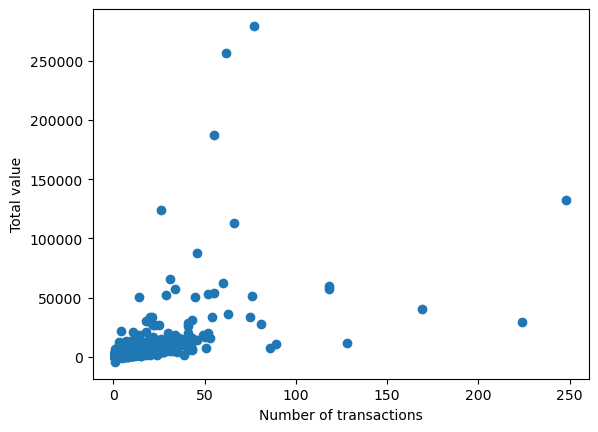

In [5]:
plt.scatter(cluster_data['InvoiceNo'], cluster_data['TOTAL_REVENUE'])
plt.ylabel('Total value')
plt.xlabel('Number of transactions')
plt.show()

c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

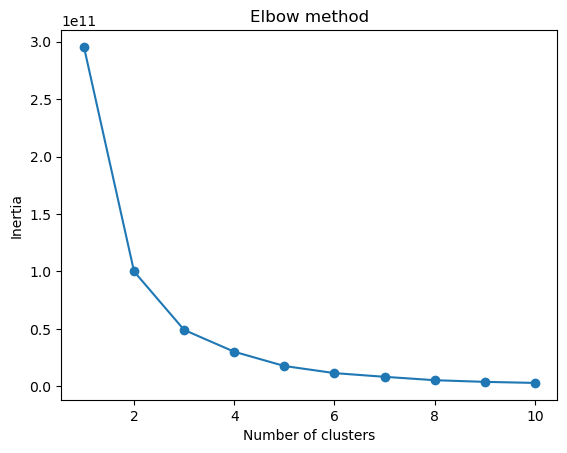

In [6]:
x = cluster_data['InvoiceNo']

y = cluster_data['TOTAL_REVENUE']

data = list(zip(x, y))
elbow = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    elbow.append(kmeans.inertia_)

plt.plot(range(1,11), elbow, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


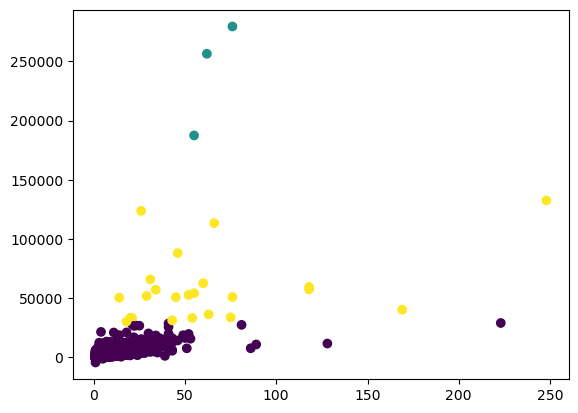

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


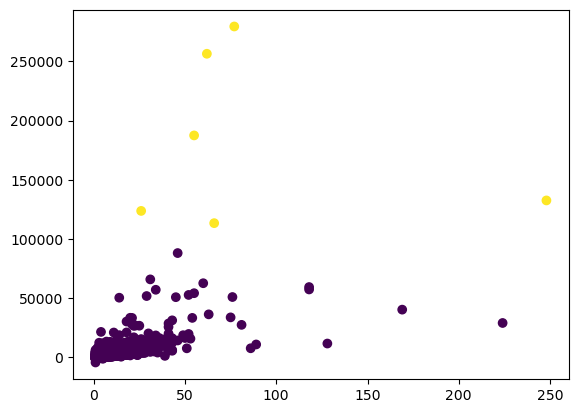

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

<h1>Có 3 tệp khách hàng chính mà cần phải quan tâm:</h1>
<p>Nhóm 1: Nhóm khách hàng với cường độ mua hàng ít tại cửa hàng và đem lại lợi nhuận thấp (màu tím)_doanh thu bé hơn 50.000 và só lượng đơn hàng bé hơn 100</p>
<p>Nhóm 2: Nhóm khách hàng trung bình khi mà đem lại doanh số ở mức độ trung bình cho cửa hàng (màu vàng) _ doanh thu < 150.000 và số lượng đơn hàng ~ 200</p>
<p>Nhóm 3: Nhóm khách hàng mang lại doanh thu lớn cho cửa hàng (màu xanh lá) _ Doanh thu từ 150.000 trở lên</p>